In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np


pplib.imports()
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
# ds.displayAs('color', ['blue', 'red', 'resolved'], 
#              ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

In [4]:
ds.printMatching({'post_process':'theory_bias', 'color':'resolved', 'denominator':'ptl'})

In [5]:
from figrid.data_container import DataContainer
ptlip = {'fieldname':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'ptl_species':'ptl',
         'mas':'CICW', 'path':'fiducial', 'simname':'tng100'}
galip = {'color_cut':'None', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'axis':0, 'grid_resolution':800,
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': 'resolved', 'fieldname':'galaxy',
     'path':'fiducial', 'simname':'tng100'}
resolved_biases = []
for s in ds.getAttrVals('snapshot'):
    for rss in ['real', 'redshift']:
        
        ptlip['snapshot'] = s
        galip['snapshot'] = s
        ptlip['space'] = rss
        galip['space'] = rss
        ptls = ds.getMatching(ptlip)
        gals = ds.getMatching(galip)
        if len(ptls) > 1:
            ds.printMatching(ptlip)

        if len(gals) > 1:
            ds.printMatching(galip)

        xdata = ptls[0].getData()[0]
        ydata = gals[0].getData()[1]/ ptls[0].getData()[1]
        ydata = np.sqrt(ydata)
        dc = DataContainer([xdata, ydata])
        dc.update(ptlip)
        dc.update(galip)
        dc.update({'censat':'both'})
        dc.add('post_process', 'obs_bias')
        dc.add('is_auto', False)
        dc.add('denominator', 'ptl')
        dc.add('numerator', 'galaxy')
        resolved_biases.append(dc)


ds.extend(resolved_biases)
    

# Investigate

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


blue
0.20105496220087435
1.774646390595511
red
0.20105496220087435
2.246166473891284
resolved
0.20105496220087435
1.8453592013887878


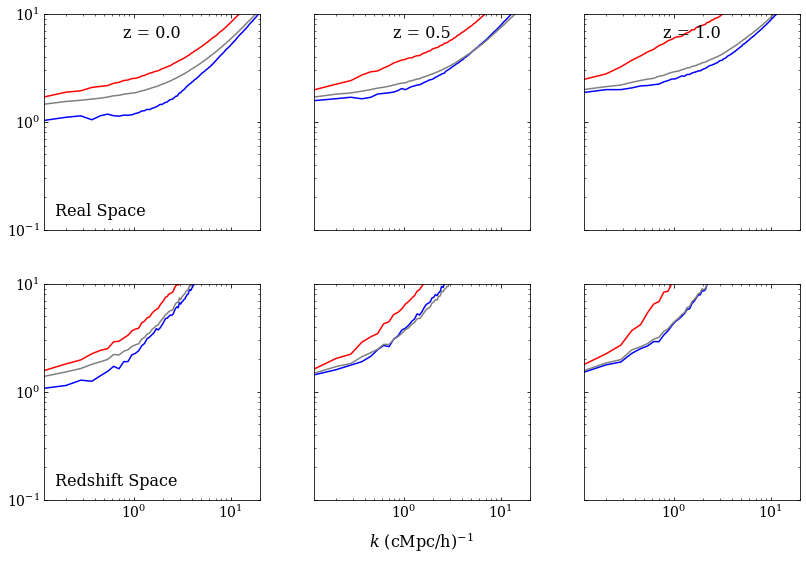

In [12]:
ip = {'is_auto':False, 'ptl_species':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.1, 10))
fg.legendArgs(loc = 'lower left', fontsize = 12)
fg.plot()
for i in fg.panels[1,2]:
    if 'figrid_process' not in i.attrs:
        print(i.attrs['color'])
        print(i.data[0][1])
        print(i.data[1][1])

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]
99 redshift
0.20105496220087435
0.8529383248849255
99 redshift
0.20105496220087435
0.8644991018862772
99 redshift
0.20105496220087435
0.8718020215201092
99 redshift
0.20105496220087435
0.8820420119705529
99 redshift
0.20105496220087435
0.901237990266246
67 redshift
0.20105496220087435
1.1693896008244915
67 redshift
0.20105496220087435
1.1169053076544804
67 redshift
0.20105496220087435
1.125597229231346
67 redshift
0.20105496220087435
1.1266186650990275
67 redshift
0.20105496220087435
1.1326308839972576
50 redshift
0.20105496220087435
1.2858266485679417
50 redshift
0.20105496220087435
1.2888539776869057
50 redshift
0.20105496220087435
1.278191038071124
50 redshift
0.20105496220087435
1.282883834161963
50 redshift
0.20105496220087435
1.3353720421081756


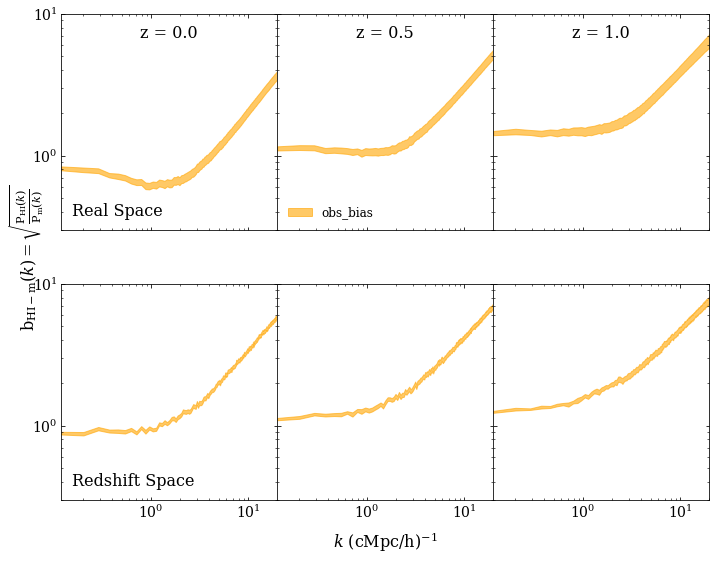

In [13]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':['real','redshift'],
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("post_process", 'space', 'snapshot', ip)
fg.plotArgs({'post_process':'obs_bias'}, color = 'orange', label = 'obs_bias')
fg.plotArgs({'post_process':'theory_bias'}, color = 'blue', label = 'th_bias')
fg.autoFill(alpha = 0.6)
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()
for pn in fg.panels[1, :]:
    for i in range(len(pn)):
        i = pn[i]
        if 'figrid_process' not in i.attrs:
            print(i.attrs['snapshot'], i.attrs['space'])
            print(i.data[0][1])
            print(i.data[1][1])

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


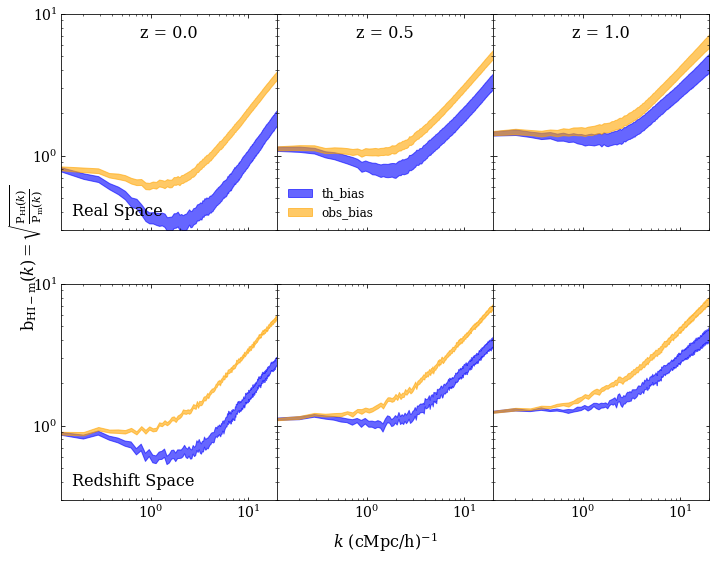

In [14]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("post_process", 'space', 'snapshot', ip)
fg.plotArgs({'post_process':'obs_bias'}, color = 'orange', label = 'obs_bias')
fg.plotArgs({'post_process':'theory_bias'}, color = 'blue', label = 'th_bias')
fg.autoFill(alpha = 0.6)
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

The row values for space: ['real', 'redshift']
The column values for simname: ['tng100', 'tng300']


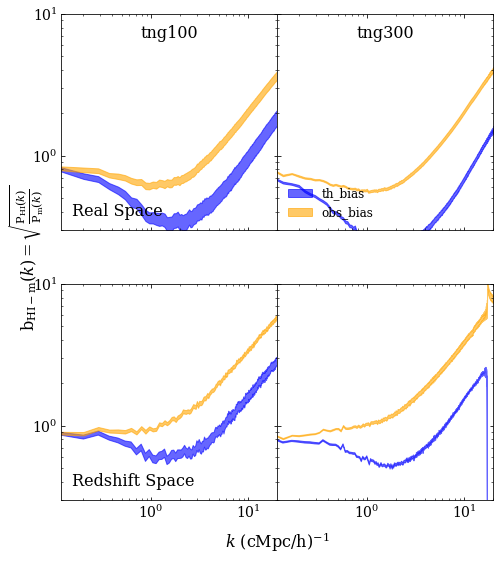

In [15]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': ['tng100', 'tng300'], 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99], 'space':['real', 'redshift'], 'denominator':'ptl'}
gspec = {'wspace':0}
fg = ds.figrid("post_process", 'space', 'simname', ip)
fg.plotArgs({'post_process':'obs_bias'}, color = 'orange', label = 'obs_bias')
fg.plotArgs({'post_process':'theory_bias'}, color = 'blue', label = 'th_bias')
fg.autoFill(alpha = 0.6)
fg.gspecArgs(**gspec)
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (.3, 10))
fg.setYLabel(pplib.obsbiaslab("HI", "m"))
fg.legendArgs(loc = "lower left", fontsize = 12, slc = (0, 1))
fg.plot()

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50]
0
blue
0.20105496220087435
0.9588938772221586
red
0.20105496220087435
0.8568378132264288
resolved
0.20105496220087435
0.9118266069818305
blue
0.20105496220087435
0.948114887791998
blue
0.20105496220087435
0.950448721518899
blue
0.20105496220087435
0.9502910553801313
blue
0.20105496220087435
0.9515664914392719
red
0.20105496220087435
0.8452307587067994
red
0.20105496220087435
0.8471117868330721
red
0.20105496220087435
0.8473279064892094
red
0.20105496220087435
0.8531335347230299
resolved
0.20105496220087435
0.9000560804821824
resolved
0.20105496220087435
0.9021179954850043
resolved
0.20105496220087435
0.902242900117319
resolved
0.20105496220087435
0.907047689299807
1
blue
0.20105496220087435
0.962939259703325
red
0.20105496220087435
0.90457062003857
resolved
0.20105496220087435
0.966231194871723
blue
0.20105496220087435
0.9530373277314037
blue
0.20105496220087435
0.9548081530500495
blue
0.2010549

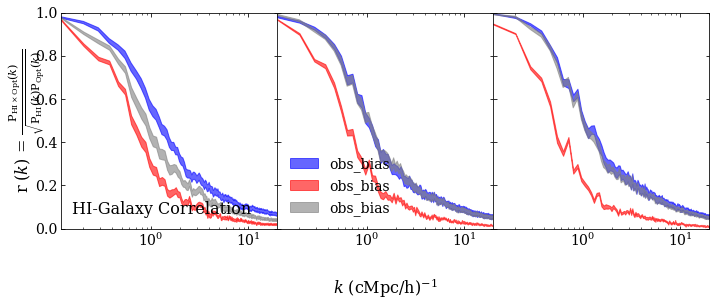

In [16]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'redshift', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Opt"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()
for pn in range(3):
    print(pn)
    for i in ccfg.panels[0,pn]:
        if 'figrid_process' not in i.attrs:
            print(i.attrs['color'])
            print(i.data[0][1])
            print(i.data[1][1])

# Website Figures

The row values for post_process: ['obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 50]


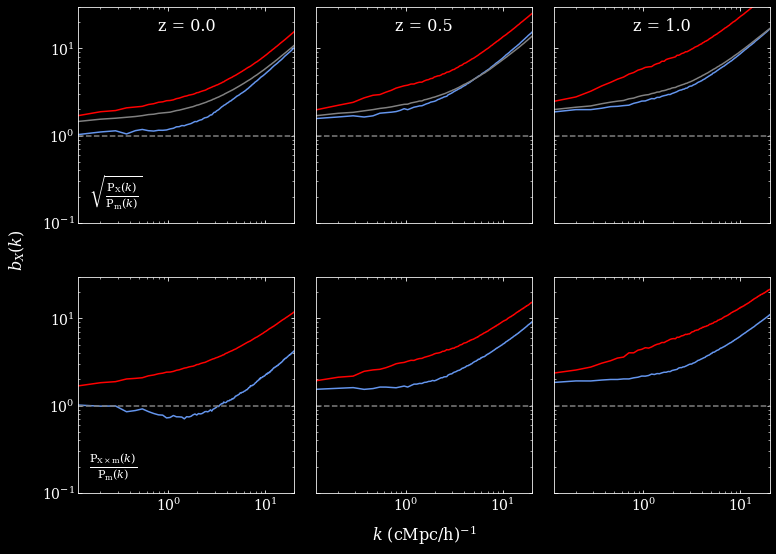

In [17]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


bfg.rowLabels([obsbias, thbias])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.plotArgs({'color':'blue'}, color = 'cornflowerblue')
bfg.setYLabel("$b_X (k)$")
bfg.setXLabel(pplib.wnum())
bfg.plotOnes()
pplib.darkmode(bfg)

bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for post_process: ['obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 50]


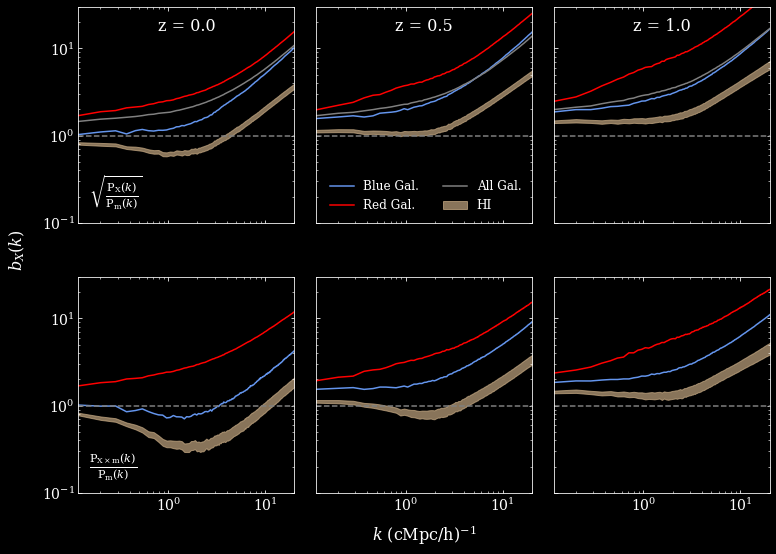

<Figure size 810x540 with 0 Axes>

In [18]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias','theory_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("", 'post_process', 'snapshot', ip)
hifg.rowLabels(["", ""])
hifg.colLabels([""]*4)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'tan')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2, labelcolor = 'white')
hifg.plot(axes = bfg.axes)
bfg.save(WEBPATH + 'images/alt_bias.png', dpi = 150)
bfg.fig

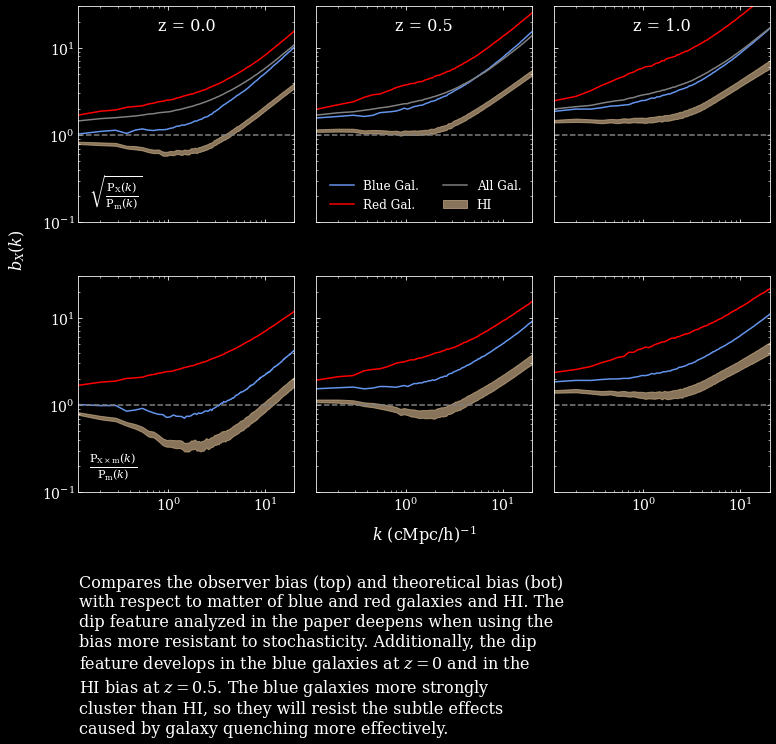

In [19]:
f = open(WEBPATH + 'captions/alt_bias.txt', 'r')
txt = f.read()
bfg.fig.text(1/bfg.fig.get_size_inches()[0], -0.05, txt, color = 'white', fontsize = 16, ha = 'left', va = 'top')
bfg.save(WEBPATH + 'images/alt_bias_caption.png', dpi = 150)
bfg.fig

# Paper Figures

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


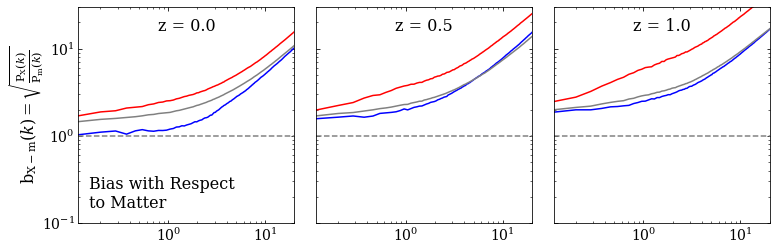

In [6]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0.1, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


bfg.rowLabels(['Bias with Respect\nto Matter'])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.1, 30))
bfg.setYLabel(pplib.obsbiaslab('X', 'm'))
bfg.setXLabel('')
bfg.plotOnes()

bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]


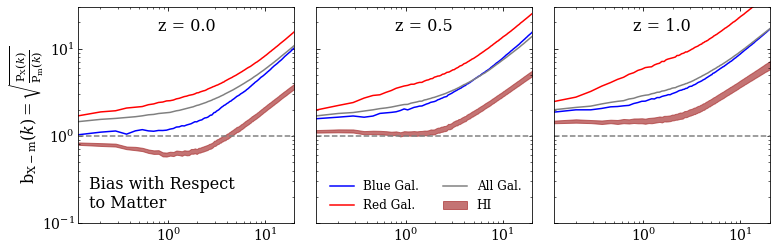

<Figure size 810x270 with 0 Axes>

In [7]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("", 'post_process', 'snapshot', ip)
hifg.rowLabels(["", ""])
hifg.colLabels([""]*4)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot(axes = bfg.axes)
bfg.fig

The row values for post_process: ['corr_coef']
The column values for snapshot: [99, 67, 50]


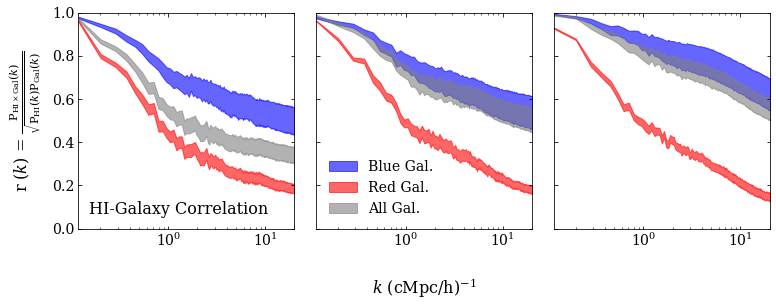

In [8]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'real', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "post_process", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()



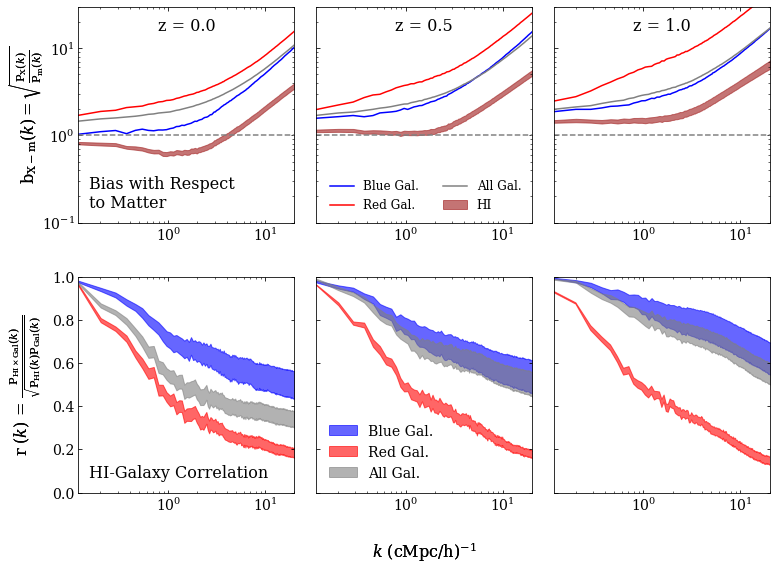

In [9]:
figarr = np.empty((2,1), dtype = object)
figarr[0,0] = bfg
figarr[1,0] = ccfg

fig = bfg.combine(figarr)
hifg.plot(axes = bfg.axes)
# fig.savefig("color_post_processR_snapshotC.png", bbox_inches = 'tight')
# fig.savefig("/Users/cosinga/code/hicolor_draft_two/figures/color_post_processR_snapshotC.pdf", dpi = 150, bbox_inches = 'tight')



The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


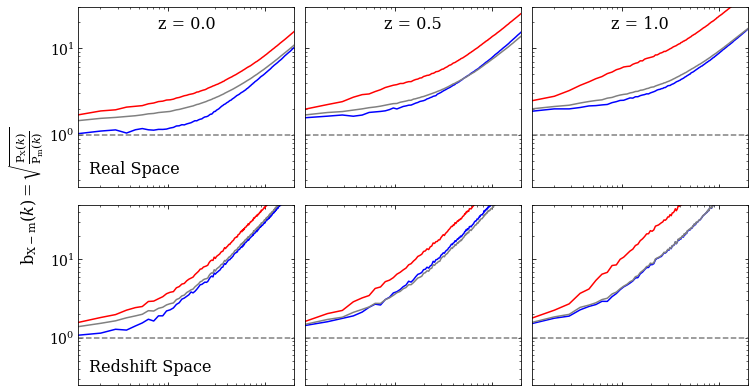

In [70]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'xborder':[0.33, 0], 'hspace':0.1, 'wspace':0.05}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])

bfg = ds.figrid("color", 'space', 'snapshot', ip)
bfg.setPanelsize(3, 2.5)
fn = 'k'
name1 = '\\mathrm{X}'
name2 = '\\mathrm{m}'
obsbias = '$\\sqrt{\\frac{\\mathrm{P}_{%s} (%s)}{\\mathrm{P}_{%s} (%s)}}$'%(name1, fn, name2, fn)
thbias = '$\\frac{\\mathrm{P}_{%s \\times %s} (%s)}{\\mathrm{P}_{%s} (%s)}$'%(name1, name2, fn, name2, fn)


# bfg.rowLabels(['Bias with Respect\nto Matter'])
bfg.gspecArgs(yborder = [0.05, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.25, 30))
bfg.setYLabel(pplib.obsbiaslab('X', 'm'))
bfg.setXLabel('')
bfg.axisArgs(slc = 'redshift', ylim = (.25, 50))
bfg.plotOnes()
bfg.tickArgs(labelbottom = False)
bfg.legendArgs(rm_legend = True)
bfg.plot()


The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


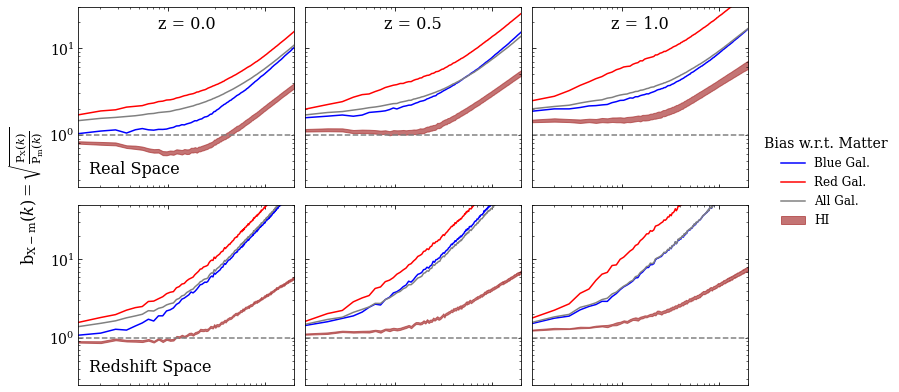

<Figure size 810x540 with 0 Axes>

In [71]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("", 'space', 'snapshot', ip)
hifg.rowLabels(["", ""])
hifg.colLabels([""]*4)
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.legendArgs(slc = (0, 2), fontsize = 12, loc = (1.05, -0.25), title = 'Bias w.r.t. Matter', title_fontsize = 14)
hifg.plot(axes = bfg.axes)
bfg.fig

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


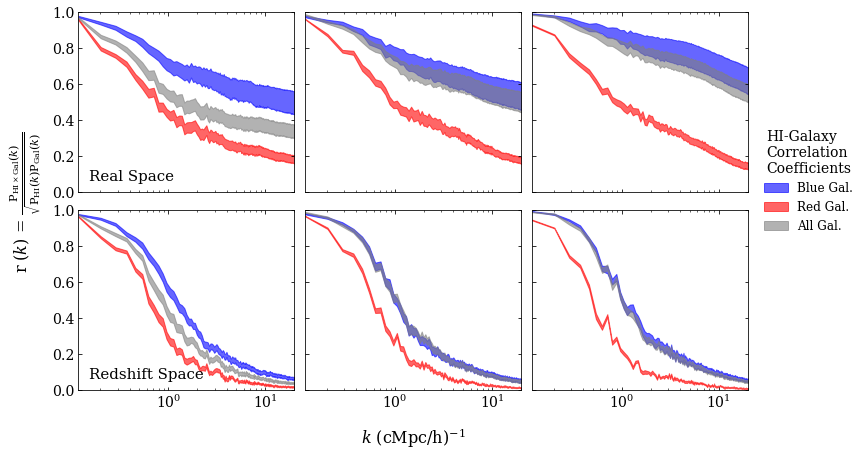

In [72]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':['real', 'redshift'], 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':'tng100',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':'fiducial'}
ccfg = ds.figrid("color", "space", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.setPanelsize(3, 2.5)
ccfg.colLabels([""]*3)
ccfg.gspecArgs(yborder = [0, 0.33], **gspec)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,2), loc = (1.05, -0.25), title = 'HI-Galaxy\nCorrelation\nCoefficients', fontsize = 12, title_fontsize = 14)
ccfg.rowLabelArgs(fontsize = 15)
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()



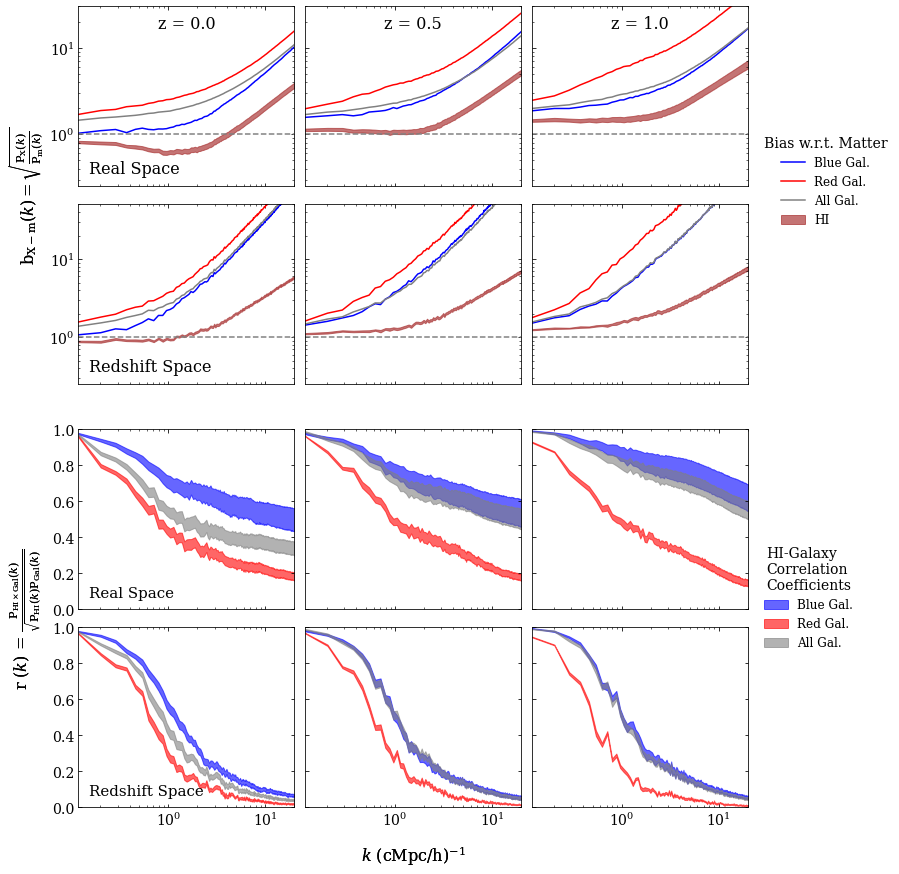

In [73]:
figarr = np.empty((2,1), dtype = object)
figarr[0,0] = bfg
figarr[1,0] = ccfg

fig = bfg.combine(figarr)
hifg.plot(axes = bfg.axes)
fig.savefig("color_spaceR_snapshotC.png", bbox_inches = 'tight')
fig.savefig("/Users/cosinga/overleaf/hicolor_draft_two/figures/color_spaceR_snapshotC.pdf", dpi = 150, bbox_inches = 'tight')



## Presentation Figures

The row values for : ['no key found']
The column values for snapshot: [50]
[0.6240601503759399, 0]
[0, 0.6240601503759399]


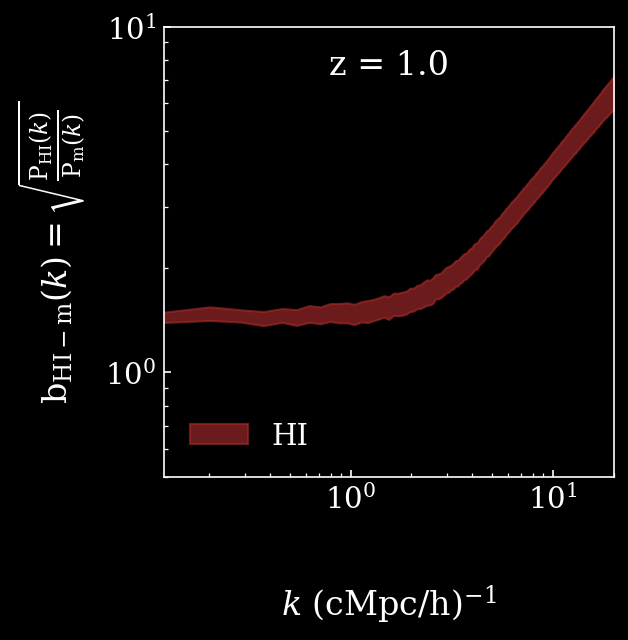

In [21]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("post_processing", '', 'snapshot', ip)
pplib.darkmode(hifg)

hifg.rowLabels([""])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.colLabels(["z = 1.0"])
hifg.legendArgs(loc = 'lower left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for : ['no key found']
The column values for : ['no key found']
[0.6240601503759399, 0]
[0, 0.6240601503759399]


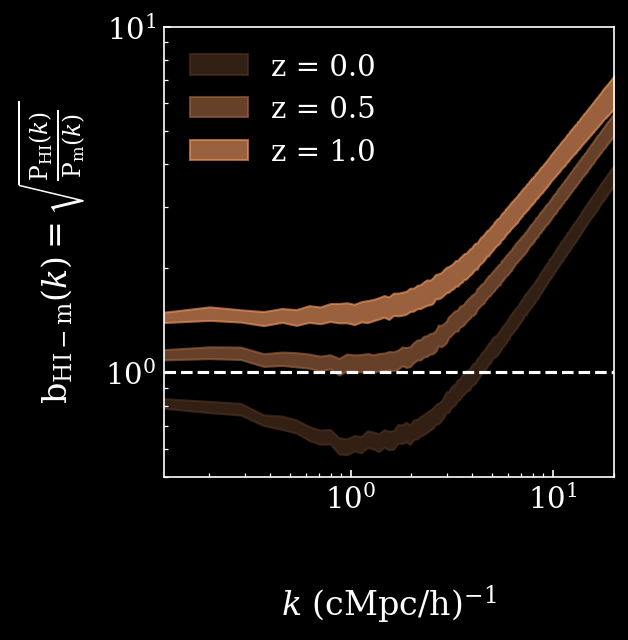

In [26]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':'obs_bias', 'snapshot':[50, 67, 99], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
hifg = ds.figrid("snapshot", '', '', ip)
pplib.darkmode(hifg)
ip['snapshot'].reverse()
hifg.rowLabels([""])
hifg.setCmap('copper', ip['snapshot'])
hifg.figArgs(dpi = 150)
hifg.gspecArgs(xborder = [0.33, 0], yborder = [0, 0.33])
hifg.legendArgs(loc = 'upper left')
hifg.axisArgs(ylim = [.5, 10])
hifg.autoFill(label = 'HI', alpha = 0.65, color = 'brown')
hifg.setYLabel(pplib.obsbiaslab("HI", "m"))
hifg.plotOnes(color = 'white')
pplib.darkmode(hifg)
# hifg.legendArgs(slc = (0, 1), fontsize = 12, loc = 'lower right', ncol = 2)
hifg.plot()

The row values for post_process: ['obs_bias']
The column values for snapshot: [99, 67, 50]
[0.5495495495495496, 0]
[0, 0.6]


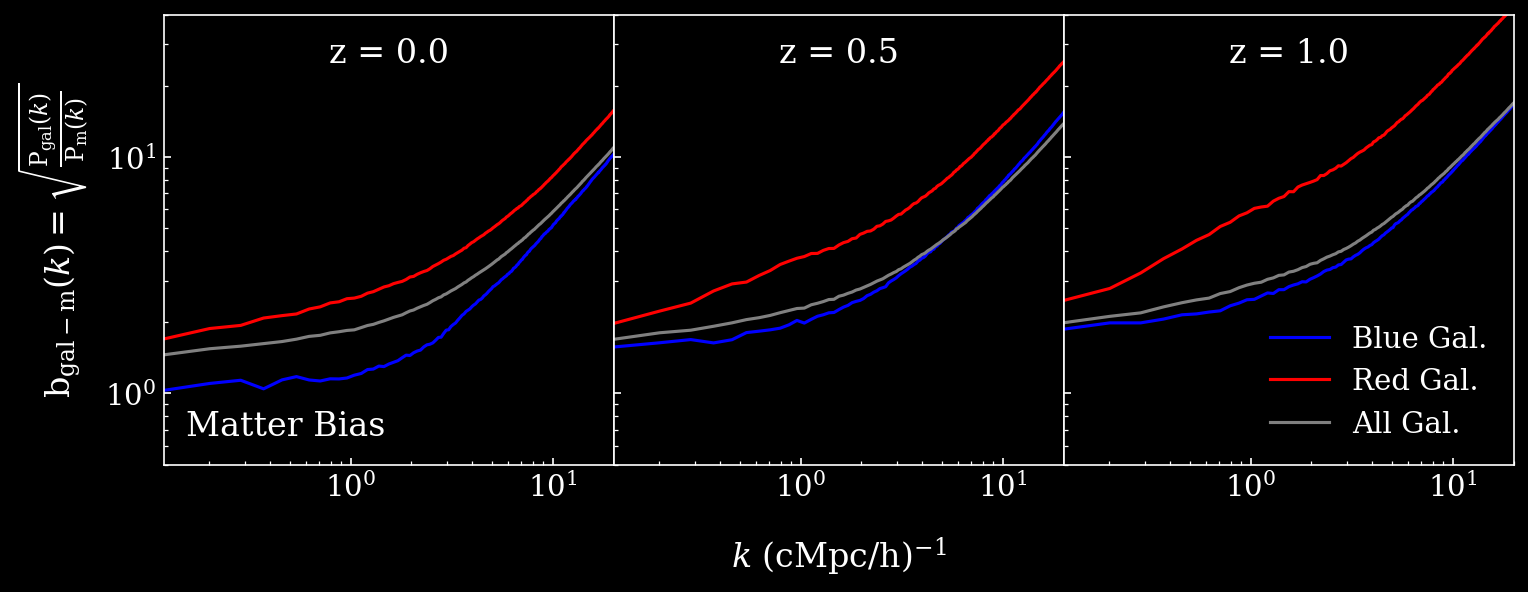

In [31]:
ip = {'is_auto':False, 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'ptl_species':'ptl',
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':'real',
     'path':'fiducial', 'denominator':'ptl'}
gspec = {'wspace':0, 'xborder':[0.33, 0]}
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue Gal.', 'Red Gal.', 'All Gal.'])
bfg = ds.figrid("color", 'post_process', 'snapshot', ip)

bfg.rowLabels(["Matter Bias"])
bfg.gspecArgs(yborder = [0, 0.25], **gspec)
bfg.setDefaultTicksParams()
bfg.axisArgs(ylim = (.5, 40))
bfg.legendArgs(loc = 'lower right')
bfg.setYLabel(pplib.obsbiaslab("gal", "m"))
pplib.darkmode(bfg)
bfg.plot()

The row values for : ['no key found']
The column values for color: ['red', 'blue', 'resolved']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


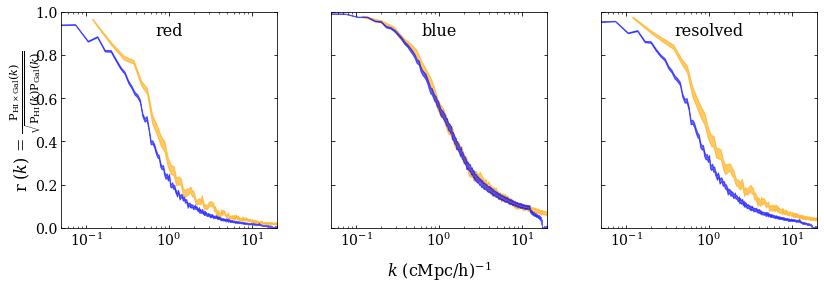

In [5]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'redshift', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99], 'simname':['tng300', 'tng100', 'tng100-2'],
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':['fiducial', 'low-2']}
ccfg = ds.figrid("simname", "", 'color', ip)
ccfg.plotArgs({"simname":'tng100'}, color = 'orange')
ccfg.plotArgs({'simname':'tng300'}, color = 'blue')
ccfg.plotArgs({'simname':'tng100-2'}, color = 'red')
ccfg.autoFill(alpha = 0.6)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(slc = (0,1), loc = 'lower left')
# ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1), xlim = (.05, 20))
ccfg.plot()

In [7]:
xip = {'is_auto':False, 'space':'redshift', 'gal_res':'diemer', 'snapshot':99,
      'simname':'tng300', 'color':['resolved'], 
      'HI_fieldname':'vn', 'post_process':'corr_coef'}
xpk = ds.getMatching(xip)
print(len(xpk))
xpk[0].getData()

1


[array([ 0.04341288,  0.07355669,  0.10462391,  0.13578833,  0.16756584,
         0.19745789,  0.22813252,  0.25893781,  0.29001768,  0.32079145,
         0.35105526,  0.38184687,  0.41319019,  0.44374901,  0.47418487,
         0.50476246,  0.53540314,  0.56611858,  0.59691203,  0.62771574,
         0.65829307,  0.68875588,  0.71957735,  0.75017809,  0.78080856,
         0.81170301,  0.84253446,  0.8730562 ,  0.90358717,  0.93405209,
         0.96482433,  0.99557938,  1.02631185,  1.05702913,  1.08765867,
         1.11835123,  1.14884952,  1.17946858,  1.21017392,  1.24072793,
         1.27138256,  1.30207677,  1.33288944,  1.36367301,  1.39432502,
         1.42481769,  1.45534139,  1.48604031,  1.51672153,  1.54739911,
         1.57814028,  1.60886255,  1.63959826,  1.67009774,  1.70072107,
         1.7314203 ,  1.7619107 ,  1.79256931,  1.82324283,  1.85397758,
         1.88465359,  1.91519033,  1.94598268,  1.97662109,  2.00727633,
         2.03795818,  2.06848812,  2.09923204,  2.1

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


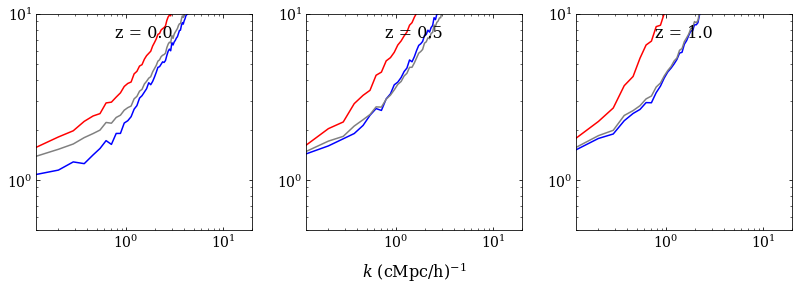

In [10]:
ip = {'is_auto':False, 'ptl_species':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50], 'space':['redshift'],
     'path':'fiducial', 'denominator':'ptl'}
fg = ds.figrid('color', '', 'snapshot', ip)
fg.axisArgs(ylim = (0.5, 10))
fg.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The row values for : ['no key found']
The column values for snapshot: [99]


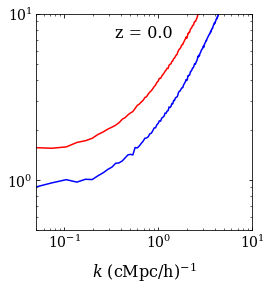

In [12]:
ip = {'is_auto':False, 'ptl_species':'ptl', 
      'axis':0, 'grid_resolution':800, 'simname': 'tng300', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99], 'space':['redshift'],
     'path':'fiducial', 'denominator':'ptl'}

fg = ds.figrid('color', '', 'snapshot', ip)
fg.axisArgs(ylim = (0.5, 10), xlim = (0.05, 10))
fg.plot()

In [19]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias'], 'snapshot':[99, 67, 50], 'space':['real','redshift'],
     'path':'fiducial', 'denominator':'ptl'}


The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


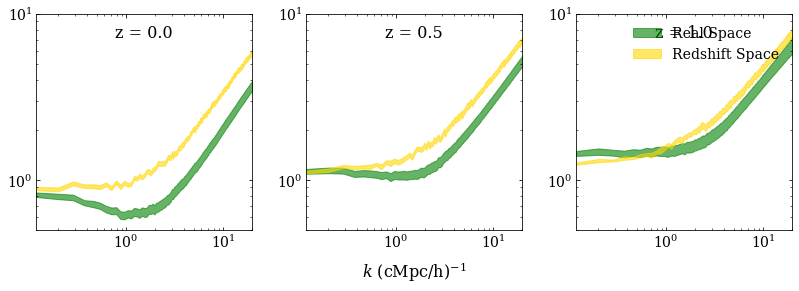

In [22]:
fg = ds.figrid('space', '', 'snapshot', ip)
fg.plotArgs({'space':'redshift'}, color = 'gold')
fg.plotArgs({'space':'real'}, color = 'green')
fg.autoFill()

fg.axisArgs(ylim = (0.5, 10))
fg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


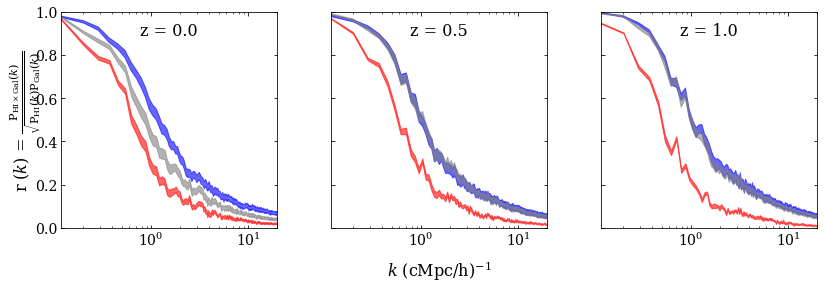

In [30]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn', 'hiptl'], 'space':'redshift', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99, 67, 50], 'simname':['tng100'],
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
     'path':['fiducial', 'low-2']}
ccfg = ds.figrid("color", "", 'snapshot', ip)
ccfg.autoFill(alpha = 0.6)
ccfg.setDefaultTicksParams()
ccfg.setYLabel(pplib.cclab("HI", "Gal"))
ccfg.legendArgs(rm_legend = True)
# ccfg.rowLabels(["HI-Galaxy Correlation"])
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.plot()

In [31]:
ip = {'is_auto':False, 'post_process':'corr_coef', 'HI_fieldname':['vn'], 'space':'redshift', 'gal_res':'diemer',
      'gal_species':'stmass', 'snapshot':[99], 'simname':['tng300'],
      'censat':['no key found', 'both'], 'mas':'CICW', 'color': ['red'],
     'path':['fiducial']}
redcc = ds.getMatching(ip)[0].getData()
ip['color'] = 'blue'
bluecc = ds.getMatching(ip)[0].getData()
ip['post_process'] = 'obs_bias'
redb = ds.getMatching(ip)

# Nonlinearity Figures

In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np


pplib.imports()
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))
print(ds.getAttrs())

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.axisLabelArgs('both', fontsize = 16)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center' , va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])

ds.setOrder('space', ['real', 'redshift', 'rsd'])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
# ds.displayAs('color', ['blue', 'red', 'resolved'], 
#              ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])

ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])

ds.setXLabel(pplib.wnum())
ds.getAttrVals('post_process')

['path', 'result_type', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'map', 'model', 'HI_fieldname', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


['no key found', 'theory_bias', 'obs_bias', 'corr_coef']

The row values for snapshot: [99]
The column values for post_process: ['obs_bias', 'theory_bias']


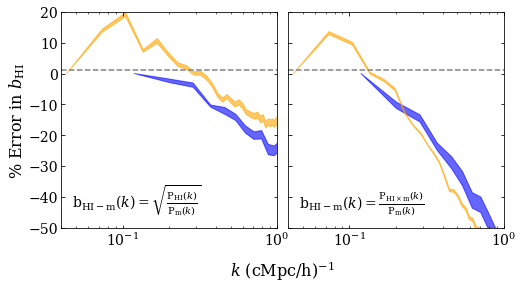

In [98]:
def lin_error(dc):
    data = dc.getData()
    x = data[0]
    y = data[1]
#     lin_est = np.mean(y[:3])
    lin_est = y[0]
    y = (y - lin_est) / lin_est * 100
    dc.setData([x, y])
    return

ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': ['tng100','tng300'],
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99], 'space':['real'],
     'path':'fiducial', 'denominator':'ptl'}
fg = ds.figrid('simname', 'snapshot', 'post_process', ip)
for i in range(len(fg.panels)):
    for dlist in fg.panels[i]:
        for dc in dlist:
            lin_error(dc)
fg.gspecArgs(hspace = 0.05)
fg.axisArgs(xlim = [.04, 1], yscale = 'linear', ylim = [-50, 20])
fg.plotArgs({'simname':'tng100'}, color = 'blue', label = 'TNG100')
fg.plotArgs({'simname':'tng300'}, color = 'orange', label = 'TNG300')
# fg.legendArgs(slc = 'theory_bias', loc = 'upper right', fontsize = 12)
fg.legendArgs(rm_legend = True)
fg.setYLabel('% Error in $b_{\\mathrm{HI}}$')
fg.setDefaultTicksParams()
fg.autoFill(alpha = 0.6)
fg.rowLabels(['', ''])
fg.colLabels([pplib.obsbiaslab('HI', 'm'), pplib.thbiaslab('HI', 'm')], pos = [0.05, 0.05])
fg.colLabelArgs(ha = 'left', va = 'bottom', fontsize = 14)
fg.plotOnes()
fg.plot()

The row values for snapshot: [99]
The column values for post_process: ['obs_bias', 'theory_bias']


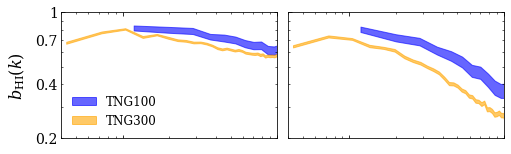

In [99]:
ip = {'is_auto':False, "HI_fieldname":['vn', 'hiptl'],      
      'axis':0, 'grid_resolution':800, 'simname': ['tng100', 'tng300'],
      'sim_resolution':'high', 'ptl_species':'ptl',
      'mas':'CICW',
      'post_process':['obs_bias', 'theory_bias'], 'snapshot':[99], 'space':['real'],
     'path':'fiducial', 'denominator':'ptl'}
fgb = ds.figrid('simname', 'snapshot', 'post_process', ip)
fgb.setPanelsize(3, 1.75)
fgb.gspecArgs(hspace = 0.05)

fgb.plotArgs({'simname':'tng100'}, color = 'blue', label = 'TNG100')
fgb.plotArgs({'simname':'tng300'}, color = 'orange', label = 'TNG300')
fgb.legendArgs(slc = 'obs_bias', loc = 'lower left', fontsize = 12)
# fgb.legendArgs(rm_legend = True)
fgb.setYLabel('$b_{\\mathrm{HI}} (k)$')
fgb.setXLabel('')
fgb.axisArgs(xlim = [0.04, 1], ylim = (.2, 1))
fgb.setDefaultTicksParams()
fgb.autoFill(alpha = 0.6)
fgb.rowLabels(['', ''])
fgb.tickArgs(labelbottom = False)
# fg.colLabels([pplib.obsbiaslab('HI', 'm'), pplib.thbiaslab('HI', 'm')], pos = [0.05, 0.95])
# fg.colLabelArgs(ha = 'left', va = 'top')
fgb.colLabels(['',''])
fgb.plot()
ticks = np.arange(0.2, 1.1, 0.1)
labels = [""] * len(ticks)
labels[0] = "0.2"
# labels[1] = "0.3"
labels[2] = "0.4"
labels[5] = "0.7"
# labels[3] = "0.5"
fgb.axes[0,0].set_yticks(ticks, labels = labels, minor = True)
fgb.axes[0,0].set_yticks([1], labels = ["1"], minor = False)

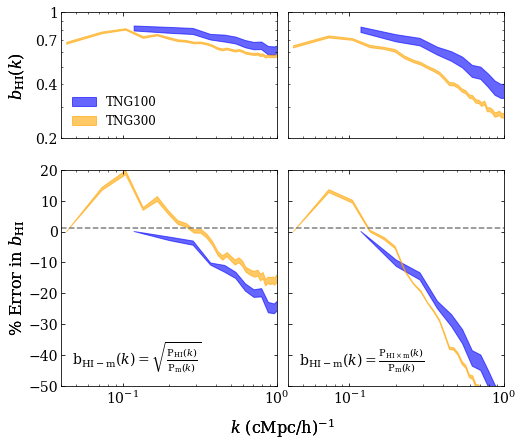

In [100]:
figarr = np.empty((2,1), dtype = "object")
figarr[0] = fgb
figarr[1] = fg
fig = fg.combine(figarr)

ticks = np.arange(0.2, 1.1, 0.1)
labels = [""] * len(ticks)
labels[0] = "0.2"
# labels[1] = "0.3"
labels[2] = "0.4"
labels[5] = "0.7"
# labels[3] = "0.5"
fgb.axes[0,0].set_yticks(ticks, labels = labels, minor = True)
fgb.axes[0,0].set_yticks([1], labels = ["1"], minor = False)
fig.savefig("/Users/cosinga/overleaf/hicolor_draft_two/figures/bhi_error.pdf", dpi = 150, bbox_inches = 'tight')